In [1]:
!pip install -U langgraph "langchain[anthropic]" langchain-community langchain-text-splitters bs4

# **Lesson 2: Simple Graph**

In [2]:
from typing import TypedDict

class State(TypedDict):
  graph_state: str

In [3]:
def node_1(state):
  return {'graph_state': state['graph_state']+"Hi"}

def node_2(state):
  return {'graph_state': state['graph_state']+" I'm "}

def node_3(state):
  return {'graph_state': state['graph_state']+" Ara"}

def node_4(state):
  return {'graph_state': state['graph_state']+" Az"}

In [5]:
import random
from typing import Literal

def decide_person[Callable](state) -> Literal['node_3', 'node_4']:
  user_input = state['graph_state']
  if random.random() > 0.5:
    return 'node_3'
  else:
    return 'node_4'

In [6]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node(node_1, 'node_1')
builder.add_node(node_2, 'node_2')
builder.add_node(node_3, 'node_3')
builder.add_node(node_4, 'node_4')

builder.add_edge(START, 'node_1')
builder.add_edge('node_1', 'node_2')
builder.add_conditional_edges('node_2', decide_person)
builder.add_edge('node_3', END)
builder.add_edge('node_4', END)

graph = builder.compile()

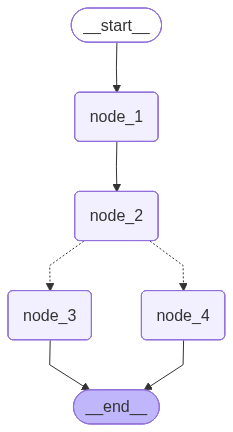

In [7]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({'graph_state':"Hello. "})

{'graph_state': "Hello. Hi I'm  Az"}

# **Lesson 3: Chains**

In [9]:
from rich.console import Console
from rich.panel import Panel
from langchain_core.messages import AIMessage, HumanMessage

console = Console()
book = "Harry Potter"

messages = [
    AIMessage(content=f"こんにちは、AIです。{book}に興味がありますか?", name="人工知能"),
    HumanMessage("はい、好きです。", name="山田"),
    AIMessage(content=f"好きなところを教えてもらえませんか？", name="人工知能"),
    HumanMessage(f"{book}の世界が好きです.", name="山田"),
]

for m in messages:
    if isinstance(m, AIMessage):
        panel = Panel(m.content, title=m.name, title_align="left", border_style="cyan")
    elif isinstance(m, HumanMessage):
        panel = Panel(m.content, title=m.name, title_align="left", border_style="green")
    console.print(panel)

╭─ 人工知能 ──────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ こんにちは、AIです。Harry Potterに興味がありますか?                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ 山田 ──────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ はい、好きです。                                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ 人工知能 ──────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ 好きなところを教えてもらえませんか？                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ 山田 ──────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Harry Potterの世界が好きです.                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:
from langchain_anthropic import ChatAnthropic
import os

os.environ["ANTHROPIC_API_KEY"] = 'None' # API KEY

llm = ChatAnthropic(
        model="claude-sonnet-4-5-20250929",
      )
result = llm.invoke(messages)
print(result)

In [ ]:
result.content

'わかりました！Harry Potterの世界の魅力は本当に素晴らしいですよね。魔法、ホグワーツ城、様々な魔法生物、そして魔法界の文化など、J.K.ローリングが創り上げた世界観はとても豊かで魅力的です。\n\n特にどんな要素が好きですか？例えば：\n- ホグワーツの4つの寮\n- 魔法の授業や呪文\n- ダイアゴン横丁などの魔法界の場所\n- ファンタスティック・ビーストのような魔法生物\n\n何か特に心に残っているシーンや場所はありますか？'

In [ ]:
result.response_metadata

{'id': 'msg_01B4vBTW3PvbnGvrQo1VNZcw',
 'model': 'claude-sonnet-4-5-20250929',
 'stop_reason': 'end_turn',
 'stop_sequence': None,
 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0,
   'ephemeral_5m_input_tokens': 0},
  'cache_creation_input_tokens': 0,
  'cache_read_input_tokens': 0,
  'input_tokens': 84,
  'output_tokens': 204,
  'server_tool_use': None,
  'service_tier': 'standard'},
 'model_name': 'claude-sonnet-4-5-20250929',
 'model_provider': 'anthropic'}

In [15]:
def favorite_book() -> str:
  return "Deathly Hallows"

llm_with_tools = llm.bind_tools([favorite_book])

NameError: name 'llm' is not defined

In [ ]:
llm.invoke([HumanMessage(content="What is my favorite book?", name="山田")])

AIMessage(content="I don't have any information about your favorite book. We haven't spoken before, and I don't have access to your personal preferences or reading history.\n\nIf you'd like to tell me about your favorite book, I'd be happy to discuss it with you!", additional_kwargs={}, response_metadata={'id': 'msg_01Ro7iaeEwJh2oM4o3fmP2Tm', 'model': 'claude-sonnet-4-5-20250929', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 13, 'output_tokens': 57, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-sonnet-4-5-20250929', 'model_provider': 'anthropic'}, id='lc_run--019b6e4d-6a9a-72a2-ab6e-15021ee70b17-0', usage_metadata={'input_tokens': 13, 'output_tokens': 57, 'total_tokens': 70, 'input_token_details': {'cache_read': 0, 'cache_creation': 0, 'ephemeral_5m_input_tokens': 0, 'ephemeral_1h

In [ ]:
llm_with_tools.invoke("What is my favorite book?")

AIMessage(content=[{'id': 'toolu_01WrDr8GYvaz2Avr6k4TrqL2', 'input': {}, 'name': 'favorite_book', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_01VqLhtWTwQoPUGiCrESncYq', 'model': 'claude-sonnet-4-5-20250929', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 538, 'output_tokens': 36, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-sonnet-4-5-20250929', 'model_provider': 'anthropic'}, id='lc_run--019b6e4c-3c0c-7310-9595-b54d5c248271-0', tool_calls=[{'name': 'favorite_book', 'args': {}, 'id': 'toolu_01WrDr8GYvaz2Avr6k4TrqL2', 'type': 'tool_call'}], usage_metadata={'input_tokens': 538, 'output_tokens': 36, 'total_tokens': 574, 'input_token_details': {'cache_read': 0, 'cache_creation': 0, 'ephemeral_5m_input_tokens': 0, 'ephemeral_1h_input_tokens': 0}})

In [ ]:
from typing import TypedDict
from langchain_core.messages import AnyMessage

class GraphState(State):
  messages: list[AnyMessage]

In [ ]:
from typing import TypedDict, Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class GraphState(State):
  messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
from IPython.display import display, Image
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
  pass

def tool_calling_llm(state: MessagesState):
  return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

graph = builder.compile()

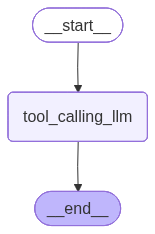

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages = graph.invoke({'messages': HumanMessage(content='What is my favorite book?', name='山田')})

In [ ]:
messages

{'messages': [HumanMessage(content='What is my favorite book?', additional_kwargs={}, response_metadata={}, name='山田', id='650517ec-20f3-4ba1-9308-b6188786fda4'),
  AIMessage(content="I don't have access to information about your favorite book. I don't have any tools or data that would tell me about your personal preferences, reading history, or favorites.\n\nIf you'd like to tell me what your favorite book is, I'd be happy to discuss it with you! Or if you're looking for book recommendations, I can help with that as well.", additional_kwargs={}, response_metadata={'id': 'msg_01URH8tkbStWiH27veXN2WQ7', 'model': 'claude-sonnet-4-5-20250929', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 596, 'output_tokens': 79, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-sonnet-4-5-20250929', 'mo

## **Lesson 5: Routers**

In [18]:
def find_school_info(school_name: str) -> str:
  """
  Find the school info.
  Args:
    school_name: The name of the school.
  Returns:
    The school info.
  """

  return f"The school {school_name} is located in Hawaii."

In [28]:
from langchain_anthropic import ChatAnthropic
import os

llm = ChatAnthropic(
        model="claude-sonnet-4-5-20250929",
      )
llm_with_tools = llm.bind_tools([find_school_info])

In [21]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage

def tool_calling_llm(state: MessagesState):
  return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(MessagesState)

builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools=[find_school_info]))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", END)

graph = builder.compile()

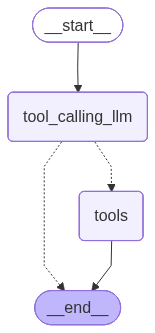

In [22]:
graph

In [30]:
messages = graph.invoke({'messages': HumanMessage(content='What is my favorite book?', name='山田')})

TypeError: "Could not resolve authentication method. Expected either api_key or auth_token to be set. Or for one of the `X-Api-Key` or `Authorization` headers to be explicitly omitted"

In [24]:
messages

[AIMessage(content='こんにちは、AIです。Harry Potterに興味がありますか?', additional_kwargs={}, response_metadata={}, name='人工知能', tool_calls=[], invalid_tool_calls=[]),
 HumanMessage(content='はい、好きです。', additional_kwargs={}, response_metadata={}, name='山田'),
 AIMessage(content='好きなところを教えてもらえませんか？', additional_kwargs={}, response_metadata={}, name='人工知能', tool_calls=[], invalid_tool_calls=[]),
 HumanMessage(content='Harry Potterの世界が好きです.', additional_kwargs={}, response_metadata={}, name='山田')]

In [ ]:
messages = graph.invoke({'messages': HumanMessage(content='Give me school info?', name='山田')})

In [ ]:
messages

{'messages': [HumanMessage(content='Give me school info?', additional_kwargs={}, response_metadata={}, name='山田', id='702417e1-0308-4238-86cd-d20cf75d5a70'),
  AIMessage(content="I'd be happy to help you find school information! However, I need to know which school you're looking for. Could you please provide the name of the school you'd like information about?", additional_kwargs={}, response_metadata={'id': 'msg_016Wob85Mvnreb16xUrLzEjW', 'model': 'claude-sonnet-4-5-20250929', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 592, 'output_tokens': 42, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-sonnet-4-5-20250929', 'model_provider': 'anthropic'}, id='lc_run--019b6f03-bf9a-76a3-b123-7ed40d9d297c-0', usage_metadata={'input_tokens': 592, 'output_tokens': 42, 'total_tokens': 634, 'inp

In [ ]:
messages = graph.invoke({'messages': HumanMessage(content='Give me school info of Pinecrest High', name='山田')})

In [ ]:
messages

{'messages': [HumanMessage(content='Give me school info of Pinecrest High', additional_kwargs={}, response_metadata={}, name='山田', id='d87c1ea0-3dbc-46a6-9770-2a69f0cb799b'),
  AIMessage(content=[{'id': 'toolu_014nm7QdpwkeVjVxFDPRhNnd', 'input': {'school_name': 'Pinecrest High'}, 'name': 'find_school_info', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_01NzgrayUgddWw3L1AYJNENv', 'model': 'claude-sonnet-4-5-20250929', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 597, 'output_tokens': 61, 'server_tool_use': None, 'service_tier': 'standard'}, 'model_name': 'claude-sonnet-4-5-20250929', 'model_provider': 'anthropic'}, id='lc_run--019b6f04-4370-75c3-b628-b3b7df142f87-0', tool_calls=[{'name': 'find_school_info', 'args': {'school_name': 'Pinecrest High'}, 'id': 'toolu_014nm7QdpwkeVjVxFDPRh

In [ ]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition, ToolNode

builder = StateGraph(MessagesState)

builder.add_node("assistant", tool_calling_llm)
builder.add_node("tools", ToolNode(tools=[find_school_info]))
builder.add_edge(START, "assistant")
builder.add_conditional_edges("tools", tools_condition)
builder.add_edge("tools", "assistant")

graph = builder.compile()

## **Lesson 6: Agent**